# Assignment 4

The assignment 4 contains 3 questions and the due date is May 9th (Sunday) 23:59PM.

## Question 1 Customer Segmentation

The management team of a large shopping mall would like to understand the types of people who are, or could be, visiting their mall. They have good reasons to believe that there are a few different market segments, and they are considering designing and positioning the shopping mall services better in order to attract mainly a few profitable market segments, or to differentiate their services (e.g. invitations to events, discounts, etc) across market segments.

We aim to describe attitudes of people to shopping in a shopping mall using a small dataset (`Mall_Visits.csv`). To make these decisions, the management team run a market research survey of a few potential customers. In this case this was a small survey to only a few people, where each person answered six attitudinal questions and a question regarding how often they visit the mall, all on a scale 1-7, as well as one question regarding their household income:

| Name        | Name           | Name  |
| ------------- |:-------------:| -----:|
| V1     | Shopping is fun | 1-7 |
| V2      | Shopping is bad for your budget      |  1-7 |
| V3 | I combine shopping with eating out      |    1-7 |
| V4     | I try to get the best buys while shopping | 1-7 |
| V5      | I don’t care about shopping      |  1-7 |
| V6 | You can save lot of money by comparing prices      |    1-7 |
| Income      | The household income of the respondent      |  Dollars |
| Mall.Visits | How often they visit the mall      |    1-7 |


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

In [ ]:
mall_visit_df = pd.read_csv('Mall_Visits.csv')
mall_visit_df.head()

ID  V1  V2  V3  V4  V5  V6  Income  Mall.Visits
0   1   6   4   7   3   2   3   60000            3
1   2   2   3   1   4   5   4   30000            1
2   3   7   2   6   4   1   3   70000            3
3   4   4   6   4   5   3   6   30000            7
4   5   1   3   2   2   6   4   60000            1

In [ ]:
index = mall_visit_df.columns

In [ ]:
mall_visit_df.describe()

ID         V1         V2         V3         V4       V5  \
count  40.000000  40.000000  40.000000  40.000000  40.000000  40.0000   
mean   20.500000   3.850000   4.100000   3.950000   4.100000   3.4500   
std    11.690452   1.874936   1.392286   1.986493   1.498717   1.7387   
min     1.000000   1.000000   2.000000   1.000000   2.000000   1.0000   
25%    10.750000   2.000000   3.000000   2.000000   3.000000   2.0000   
50%    20.500000   4.000000   4.000000   4.000000   4.000000   3.5000   
75%    30.250000   5.250000   5.000000   6.000000   5.250000   4.2500   
max    40.000000   7.000000   7.000000   7.000000   7.000000   7.0000   

              V6       Income  Mall.Visits  
count  40.000000     40.00000     40.00000  
mean    4.350000  46000.00000      3.25000  
std     1.477177  17216.56924      1.94475  
min     2.000000  25000.00000      0.00000  
25%     3.000000  30000.00000      2.00000  
50%     4.000000  42500.00000      3.00000  
75%     5.250000  60000.00000      4.25000  
max     7.000000  80000.00000      7.00000

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standarize features
scaler = StandardScaler()
mall_visit = scaler.fit_transform(mall_visit_df)

### Question 1.1 (5 points) 

Perform customer segmentation using k-Means algorithm by setting k=1. What can we infer from customer segmentation with one cluster? Explain this using the obtained centroid of cluster.

In [ ]:
from sklearn.cluster import KMeans

k = 1

kmeans = KMeans(n_clusters=k, random_state=0).fit(mall_visit)
kmeans.cluster_centers_

array([[ 8.88178420e-17, -9.43689571e-17,  3.27515792e-16,
        -8.04911693e-17,  2.27595720e-16, -6.66133815e-17,
         2.05391260e-16,  0.00000000e+00, -1.11022302e-17]])

Having only 1 cluster will results in the average of the sample's features

### Question 1.2 (10 points)

Now perform customer segmentation by setting the number of k to be 3. Explain the obtained clusters. Check the distribution of each feature across the clusters and see whether these features are statisically significantly different from each other. 

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0).fit(mall_visit)

print(kmeans.cluster_centers_)
clusters_centers = pd.DataFrame(kmeans.cluster_centers_)
kmeans.labels_ 

[[ 2.59888849e-01 -1.89051145e-01  1.26081448e+00 -3.14384524e-01
   1.28390102e+00  2.91234686e-02  1.13122543e+00 -8.92156863e-01
   1.17170020e+00]
 [-1.62430531e-01  1.02627765e+00 -3.45511660e-01  1.04511612e+00
  -6.58843944e-01 -9.17389259e-01 -3.25655806e-01  8.23529412e-01
  -2.98372438e-17]
 [-4.33148082e-02 -1.17931905e+00 -8.00132264e-01 -1.07910364e+00
  -4.05442427e-01  1.19406221e+00 -6.97017690e-01 -2.05882353e-01
  -1.17170020e+00]]


array([1, 2, 1, 0, 2, 1, 1, 1, 2, 0, 2, 1, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2,
       1, 0, 2, 1, 1, 1, 2, 0, 2, 1, 2, 0, 1, 0, 1, 0, 0, 2])

In [ ]:
clusters_centers

0         1         2         3         4         5         6  \
0  0.259889 -0.189051  1.260814 -0.314385  1.283901  0.029123  1.131225   
1 -0.162431  1.026278 -0.345512  1.045116 -0.658844 -0.917389 -0.325656   
2 -0.043315 -1.179319 -0.800132 -1.079104 -0.405442  1.194062 -0.697018   

          7             8  
0 -0.892157  1.171700e+00  
1  0.823529 -2.983724e-17  
2 -0.205882 -1.171700e+00

In [ ]:
clusters_centers.describe()

0         1         2         3         4         5         6  \
count  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000  3.000000   
mean   0.018048 -0.114031  0.038390 -0.116124  0.073205  0.101932  0.036184   
std    0.217744  1.104710  1.082779  1.075899  1.056121  1.057607  0.966341   
min   -0.162431 -1.179319 -0.800132 -1.079104 -0.658844 -0.917389 -0.697018   
25%   -0.102873 -0.684185 -0.572822 -0.696744 -0.532143 -0.444133 -0.511337   
50%   -0.043315 -0.189051 -0.345512 -0.314385 -0.405442  0.029123 -0.325656   
75%    0.108287  0.418613  0.457651  0.365366  0.439229  0.611593  0.402785   
max    0.259889  1.026278  1.260814  1.045116  1.283901  1.194062  1.131225   

              7             8  
count  3.000000  3.000000e+00  
mean  -0.091503  0.000000e+00  
std    0.863543  1.171700e+00  
min   -0.892157 -1.171700e+00  
25%   -0.549020 -5.858501e-01  
50%   -0.205882 -2.983724e-17  
75%    0.308824  5.858501e-01  
max    0.823529  1.171700e+00

In [ ]:
clusters = kmeans.predict(mall_visit)

In [ ]:
i = 0
cluster_1 = []
cluster_2 = []
cluster_3 = []

for cluster in clusters:
    if cluster == 0:
        cluster_1.append(i)
    elif cluster == 1:
        cluster_2.append(i)
    elif cluster == 2:
        cluster_3.append(i)
    i += 1

cluster_1 = mall_visit_df.iloc[cluster_1,:]
cluster_2 = mall_visit_df.iloc[cluster_2,:]
cluster_3 = mall_visit_df.iloc[cluster_3,:]

cluster_1.head()

ID  V1  V2  V3  V4  V5  V6  Income  Mall.Visits
3    4   4   6   4   5   3   6   30000            7
9   10   3   5   3   6   4   6   25000            6
13  14   4   6   4   6   4   7   35000            5
15  16   3   5   4   6   4   7   40000            4
17  18   3   7   2   6   4   3   25000            5

In [ ]:
pd.DataFrame(stats.f_oneway(cluster_1, cluster_2, cluster_3).pvalue).transpose().rename(columns=dict(zip(range(0,8), index)),index={0:'p Values'})

ID            V1            V2            V3            V4  \
p Values  0.55443  6.270615e-16  7.349478e-11  2.532751e-14  6.995444e-11   

                    V5            V6    Income             8  
p Values  2.384294e-12  1.514805e-07  0.000001  1.133325e-14

Only the ID can not be considered as not statiscally significant from the features. As ID is a random allocated number to the questioned clients.

### Question 1.3 (5 points)

Now perform customer segmentation by setting the number of k using the Elbow method and metrics of inertia, respectively. Explain what would be the k you get.

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(mall_visit)
    distortions.append(kmeans.inertia_)

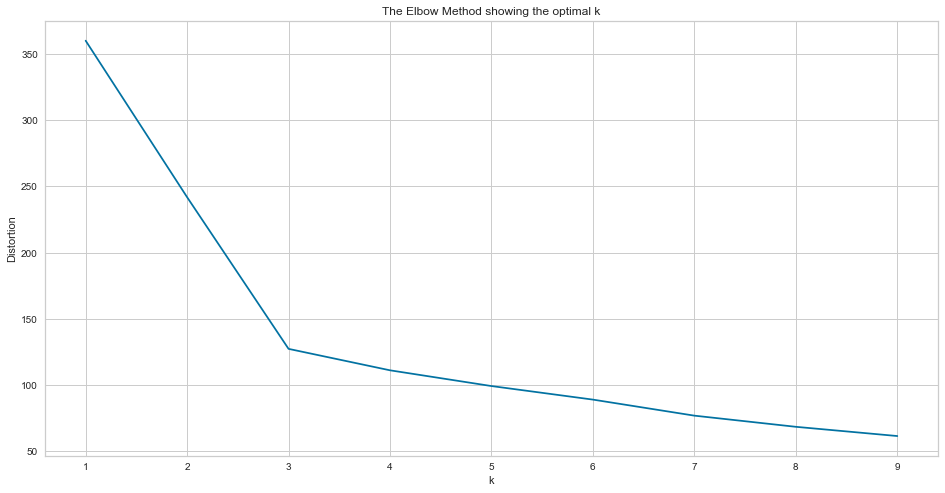

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

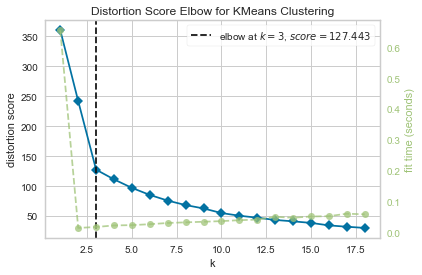

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,19))

visualizer.fit(mall_visit)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

The best k according to the elbow method is 3

## Question 2 Birds of a feather laugh together

Jester is a research project from the UC Berkeley Laboratory for Automation Science and Engineering. Users are asked to rate the jokes they read and may see more similar jokes. The dataset `jester_dataset.zip`, when unzipped, they are in Excel (.xls) format that contains ratings from 23,500 users who have rated 36 or more jokes. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated"). The text of the jokes is given `jester_dataset_joke_text.zip`. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

In [ ]:
import pandas as pd
import numpy as np

from zipfile import ZipFile

with ZipFile('jester_dataset.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [ ]:
with ZipFile('jester_dataset_joke_texts.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [ ]:
jester_data = pd.read_excel('jester-data-2.xls', header=None)

In [ ]:
jester_data.head()

0      1      2      3     4     5      6     7     8      9    ...    91   \
0   50  99.00   8.11  99.00  99.0 -2.28  -4.22  5.49 -2.62  99.00  ...  99.00   
1  100  -4.37  -3.88   0.73  -3.2 -6.41   1.17  7.82 -4.76  -6.41  ...   5.73   
2   42  99.00  99.00  99.00  99.0  0.73  99.00  5.53  3.25  99.00  ...  99.00   
3   65   0.34  -6.55   2.86  99.0 -3.64   1.12  5.34  2.33  99.00  ...  99.00   
4   37  99.00  99.00  99.00  99.0  9.13  99.00 -9.32 -2.04  99.00  ...  99.00   

    92     93     94     95     96    97     98     99     100  
0  99.0  99.00  99.00  99.00  -5.92  99.0  99.00  99.00  99.00  
1  -6.7   1.99   2.62  -0.49   3.45   3.2  -0.53  -0.53  -2.96  
2  99.0  99.00  99.00   3.16  99.00  99.0  99.00  99.00  99.00  
3  99.0  99.00  99.00  99.00  99.00  99.0  99.00  99.00  99.00  
4  99.0  99.00  99.00  99.00  99.00  99.0  99.00  99.00  99.00  

[5 rows x 101 columns]

Data cleansing in order to remove the 99 values

In [ ]:
jester_data = jester_data.replace(99, 0)
jester_data

0     1     2     3     4     5     6     7     8     9    ...   91   \
0       50  0.00  8.11  0.00  0.00 -2.28 -4.22  5.49 -2.62  0.00  ...  0.00   
1      100 -4.37 -3.88  0.73 -3.20 -6.41  1.17  7.82 -4.76 -6.41  ...  5.73   
2       42  0.00  0.00  0.00  0.00  0.73  0.00  5.53  3.25  0.00  ...  0.00   
3       65  0.34 -6.55  2.86  0.00 -3.64  1.12  5.34  2.33  0.00  ...  0.00   
4       37  0.00  0.00  0.00  0.00  9.13  0.00 -9.32 -2.04  0.00  ...  0.00   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
23495   70 -9.95  4.85 -9.95 -8.25  1.41 -1.75  3.11  3.79 -7.38  ...  0.00   
23496  100 -0.78  1.31 -2.09 -0.78  4.71  0.19  3.06 -1.31 -9.76  ...  0.29   
23497   51  0.00  0.00  0.00  0.00  6.12  0.00  5.78 -5.53  0.00  ...  0.00   
23498  100  1.02  2.77  7.09  0.05  1.26  1.41  2.62  0.49  5.19  ...  7.82   
23499   36  0.00  0.00  0.00  0.00  9.17  0.00 -9.90  2.48  0.00  ...  0.00   

        92    93    94    95    96    97    98    99    100  
0      0.00  0.00  0.00  0.00 -5.92  0.00  0.00  0.00  0.00  
1     -6.70  1.99  2.62 -0.49  3.45  3.20 -0.53 -0.53 -2.96  
2      0.00  0.00  0.00  3.16  0.00  0.00  0.00  0.00  0.00  
3      0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
4      0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
23495  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
23496 -0.92  0.53  2.14  2.48  1.02  2.57  1.02 -0.29  0.78  
23497  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
23498  1.07  4.27  3.35  0.63  2.38  2.62  2.57  1.94  3.98  
23499  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  

[23500 rows x 101 columns]

In [ ]:
jester_data.shape

(23500, 101)

In [ ]:
jester_data = jester_data.drop(labels=0, axis=1)

In [ ]:
jester_data

1     2     3     4     5     6     7     8     9     10   ...   91   \
0      0.00  8.11  0.00  0.00 -2.28 -4.22  5.49 -2.62  0.00 -2.28  ...  0.00   
1     -4.37 -3.88  0.73 -3.20 -6.41  1.17  7.82 -4.76 -6.41  0.73  ...  5.73   
2      0.00  0.00  0.00  0.00  0.73  0.00  5.53  3.25  0.00  0.00  ...  0.00   
3      0.34 -6.55  2.86  0.00 -3.64  1.12  5.34  2.33  0.00  2.33  ...  0.00   
4      0.00  0.00  0.00  0.00  9.13  0.00 -9.32 -2.04  0.00  0.00  ...  0.00   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
23495 -9.95  4.85 -9.95 -8.25  1.41 -1.75  3.11  3.79 -7.38 -5.92  ...  0.00   
23496 -0.78  1.31 -2.09 -0.78  4.71  0.19  3.06 -1.31 -9.76  9.13  ...  0.29   
23497  0.00  0.00  0.00  0.00  6.12  0.00  5.78 -5.53  0.00  7.72  ...  0.00   
23498  1.02  2.77  7.09  0.05  1.26  1.41  2.62  0.49  5.19  6.55  ...  7.82   
23499  0.00  0.00  0.00  0.00  9.17  0.00 -9.90  2.48  0.00  0.00  ...  0.00   

        92    93    94    95    96    97    98    99    100  
0      0.00  0.00  0.00  0.00 -5.92  0.00  0.00  0.00  0.00  
1     -6.70  1.99  2.62 -0.49  3.45  3.20 -0.53 -0.53 -2.96  
2      0.00  0.00  0.00  3.16  0.00  0.00  0.00  0.00  0.00  
3      0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
4      0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
23495  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
23496 -0.92  0.53  2.14  2.48  1.02  2.57  1.02 -0.29  0.78  
23497  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
23498  1.07  4.27  3.35  0.63  2.38  2.62  2.57  1.94  3.98  
23499  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  

[23500 rows x 100 columns]

In [ ]:
def get_recommendation_user(user):
    user_data = jester_data[:user]
    unreviewed = user_data[user_data==0].T
    unreviewed = unreviewed.dropna()
    unreviewed_jokes = unreviewed.index
    filter_df = cosine_similarity_item.filter(items=unreviewed_jokes)
    best5 = get_best5(user)
    filter_df = filter_df.filter(best5, axis=0)
    recommendation = filter_df.idxmax(axis=1)
    recommendation = recommendation.mode()
    return recommendation

In [ ]:
from bs4 import BeautifulSoup
def get_joke(number):
    file = 'jokes/init'+str(number)+'.html'
    soup = BeautifulSoup(open(file), 'html.parser')
    text = soup.body.get_text()
    print(text)
    
def get_best5(reviewer):
    reviewer_arr = jester_data[:reviewer].T.iloc[1:]
    best_5 = reviewer_arr.nlargest(5, 0).index
    return best_5

def get_similar(item):
    similar_item = cosine_similarity_user[item].idxmax(axis=1)
    return similar_item

In [ ]:
def get_top_5_jokes(user_id, matrix):       
    t = jester_data.iloc[user_id,range(1,100)].isna()
    unrated = [i for i, x in enumerate(t) if x]
    jokes = pd.DataFrame(matrix.iloc[user_id,unrated])
    return jokes
    #.sort_values(by=0, ascending=False).head().index

### Question 2.1 (10 points) 

Build a user-based collaborative filtering and provide a list of top 5 jokes for the first user. Check the text of jokes to see if the recommendations are sensible. 

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [ ]:
n_clusters = 10

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(jester_data)
cosine = cosine_similarity(jester_data)

In [ ]:
np.fill_diagonal(cosine, 0)
cosine_similarity_user = pd.DataFrame(cosine,index=jester_data.index)
cosine_similarity_user.shape
cosine_similarity_user.head()

0         1         2         3         4         5         6      \
0  0.000000  0.127739  0.164474  0.058265  0.148358  0.191503  0.101912   
1  0.127739  0.000000  0.038844  0.122408 -0.049464  0.181658  0.023059   
2  0.164474  0.038844  0.000000  0.264397  0.462997  0.454233  0.191334   
3  0.058265  0.122408  0.264397  0.000000 -0.075532  0.267359 -0.027745   
4  0.148358 -0.049464  0.462997 -0.075532  0.000000  0.492870  0.285634   

      7         8         9      ...     23490     23491     23492     23493  \
0  0.102595  0.075357 -0.034235  ...  0.155387  0.174373  0.101485  0.131278   
1  0.086656 -0.066844  0.017069  ...  0.168084  0.282358 -0.050900  0.176629   
2 -0.160976  0.480201 -0.273908  ...  0.079972 -0.073804  0.098113  0.022053   
3 -0.191624  0.172222  0.005659  ... -0.014560  0.159124  0.136907 -0.067625   
4 -0.082419  0.410939 -0.288774  ...  0.002238  0.122868  0.334722  0.155449   

      23494     23495     23496     23497     23498     23499  
0 -0.031358  0.003048  0.109986  0.152886 -0.000188 -0.034641  
1 -0.197047  0.126009  0.218148 -0.058194  0.002149  0.173578  
2  0.131630 -0.086688  0.249583  0.053073  0.447567  0.153719  
3 -0.167029 -0.181834 -0.005399 -0.185625  0.208795 -0.086830  
4  0.263357 -0.034363  0.182695  0.153083  0.430310  0.412804  

[5 rows x 23500 columns]

In [ ]:
print('Best jokes of similar reviewer:', get_similar(1), get_best5(get_similar(1)))

Best jokes of similar reviewer: 22472 Int64Index([2, 48, 31, 53, 50], dtype='int64')


Both Reviewers have the same top 5 jokes which is a good reference. However, providing recommendations should be considered out of the list of reviewed Jokes

### Question 2.2 (10 points) 

Build a item-based collaborative filtering and provide a list of top 5 jokes for the first user. Check the text of jokes to see if the recommendations are sensible.

In [ ]:
item_data = jester_data.T
print(item_data.shape)
cosine = cosine_similarity(item_data)
np.fill_diagonal(cosine, 0)
cosine_similarity_item = pd.DataFrame(cosine,index=item_data.index)
print(cosine_similarity_item.shape)
cosine_similarity_item.head()

(100, 23500)
(100, 100)


0         1         2         3         4         5         6   \
1  0.000000  0.396090  0.391536  0.264536  0.160148  0.244416  0.153794   
2  0.396090  0.000000  0.310064  0.307108  0.191821  0.233898  0.151774   
3  0.391536  0.310064  0.000000  0.369776  0.178561  0.277585  0.157681   
4  0.264536  0.307108  0.369776  0.000000  0.159039  0.244625  0.148358   
5  0.160148  0.191821  0.178561  0.159039  0.000000  0.170535  0.222539   

         7         8         9   ...        90        91        92        93  \
1  0.137953  0.330546  0.342070  ...  0.196589  0.172334  0.213038  0.207395   
2  0.106873  0.257453  0.261522  ...  0.130657  0.142526  0.144003  0.123625   
3  0.149202  0.342085  0.293201  ...  0.137270  0.164649  0.170900  0.154129   
4  0.115249  0.417537  0.196764  ...  0.078433  0.139521  0.083076  0.127976   
5  0.178628  0.102607  0.142865  ...  0.096379  0.096253  0.103555  0.077453   

         94        95        96        97        98        99  
1  0.207772  0.203093  0.210735  0.160898  0.146488  0.206193  
2  0.137407  0.144036  0.137578  0.224314  0.131780  0.240375  
3  0.183061  0.159856  0.159212  0.157958  0.159643  0.245915  
4  0.138770  0.128028  0.105635  0.208318  0.196733  0.270509  
5  0.091336  0.068053  0.083854  0.152625  0.104300  0.169708  

[5 rows x 100 columns]

In [ ]:
recom = get_recommendation_user(1)

In [ ]:
recom = recom.iloc[0]

In [ ]:
get_joke(recom)



 



  

Out in the backwoods of some midwestern state, little Johnny arrives
at school an hour late.

Teacher: "Why are you so late, John?"
Johny : "My big brother got shot in the ass."
(the teacher corrects his speech)
Teacher: "Rectum."
Johnny : "Wrecked him!? Hell, It damn near killed him!" 






In [ ]:
for joke in get_best5(1):
    print("Joke number", joke)
    get_joke(joke)

Joke number 2


 



  

This couple had an excellent relationship going until one day he came home
from work to find his girlfriend packing. He asked her why she was leaving him
and she told him that she had heard awful things about him. 

"What could they possibly have said to make you move out?" 

"They told me that you were a pedophile." 

He replied, "That's an awfully big word for a ten year old." 





Joke number 48


 


  

The graduate with a Science degree asks, "Why does it work?"
The graduate with an Engineering degree asks, "How does it work?"
The graduate with an Accounting degree Asks, "How much will it cost?" 
The graduate with a  Liberal Arts degree asks, "Do you want fries 
with  that?"






Joke number 31


 



  

 President Clinton looks up from his desk in the Oval Office to see
 one of his aides nervously approach him. 
 "What is it?" exclaims the President. 
"It's this Abortion Bill Mr. President, what do you want to do
 about it?" the aide replies. 
"Just g

The recommended joke will fit in the same gengre as the top 5 of the first reviewer

### Question 2.3 (10 points) 

Now build a recommendation system using matrix factorization (singular value decomposition). Get a list of top 5 jokes for the first user. Explain whether model-based recoomendation approach is better than neighborhood-based approach. Write a function that takes the parameter of user_id and return the text of recommended jokes)

In [ ]:
from sklearn.decomposition import TruncatedSVD
from scipy.linalg import sqrtm

In [ ]:
def svd(train, k):
    utilMat = np.array(train)
    # the nan or unavailable entries are masked
    mask = np.isnan(utilMat)
    masked_arr = np.ma.masked_array(utilMat, mask)
    item_means = np.mean(masked_arr, axis=0)
    # nan entries will replaced by the average rating for each item
    utilMat = masked_arr.filled(item_means)
    x = np.tile(item_means, (utilMat.shape[0],1))
    # we remove the per item average from all entries.
    # the above mentioned nan entries will be essentially zero now
    utilMat = utilMat - x
    # The magic happens here. U and V are user and item features
    U, s, V=np.linalg.svd(utilMat, full_matrices=False)
    s=np.diag(s)
    # we take only the k most significant features
    s=s[0:k,0:k]
    U=U[:,0:k]
    V=V[0:k,:]
    s_root=sqrtm(s)
    Usk=np.dot(U,s_root)
    skV=np.dot(s_root,V)
    UsV = np.dot(Usk, skV)
    UsV = UsV + x
    print("svd done")
    return UsV

In [ ]:
svdout = svd(jester_data, k=10)

svd done


In [ ]:
best_5 = np.ma.getdata(svdout)[0][~np.isnan(np.array(jester_data))[0]].argsort()[-5:]

joke_indices = np.array(list(range(1,101)))[~np.isnan(np.array(jester_data))[0]]
best_5 = joke_indices[best_5]

In [ ]:
print(best_5)

[36 32 35 50  7]


In [ ]:
for joke in best_5:
    print("Joke number:",joke)
    get_joke(joke)

Joke number: 36


 



  

A guy walks into a bar, orders a beer and says to the bartender,
"Hey, I got this great Polish Joke..." 

The barkeep glares at him and says in a warning tone of voice:
"Before you go telling that joke you better know that I'm Polish, both
bouncers are Polish and so are most of my customers"

"Okay" says the customer,"I'll tell it very slowly." 




Joke number: 32


 



  

A man arrives at the gates of heaven. St. Peter asks, "Religion?" 
The man says, "Methodist." St. Peter looks down his list, and says, 
"Go to room 24, but be very quiet as you pass room 8." 

Another man arrives at the gates of heaven. "Religion?"
"Baptist." "Go to room 18, but be very quiet as you pass room 8." 

A third man arrives at the gates. "Religion?" "Jewish."
"Go to room 11, but be very quiet as you pass room 8." 
The man says, "I can understand there being different rooms for different religions, but why
must I be quiet when I pass room 8?" St. Peter tells him, "Well the Cath

A model-based recommendation approach is more scalable compared to a neighborhood-based approach. Providing Recommendation for a platform such as Netflix, scalability is a necessity.

## Question 3 Training a deep neural network (50 points)

Practice training a deep neural network on the CIFAR10 image dataset:


In [ ]:
# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras

assert tf.__version__ >= "2.0"


keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

### Question 3.1 (10 points) 

Build a Deep Neural Network (DNN) with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this question), using the RELU activation function.

Using Adam optimization, train the network on the CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_ data() (see code below). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 5000 of which is for validation, 10,000 for testing) with 10 classes using sparse_categorical_crossentropy loss function , so you’ll need a softmax output layer with 10 neurons. 

Train the model for 100 epochs, explain whether the model will experience overfitting. 

In [ ]:
from tensorflow.keras.optimizers import Adam

print('Shape:', X_train.shape)
print('Type:', X_train_full.dtype)

Shape: (45000, 32, 32, 3)
Type: uint8


In [ ]:
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

for layer in range(19):
    model.add(keras.layers.Dense(100, activation="relu"))

model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
import time
begin = time.perf_counter()

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

end = time.perf_counter()
timespent = end - begin

Epoch 1/100
1407/1407 [==============================] - 15s 9ms/step - loss: 2.1509 - accuracy: 0.1624 - val_loss: 2.0263 - val_accuracy: 0.2038
Epoch 2/100
1407/1407 [==============================] - 8s 6ms/step - loss: 2.0257 - accuracy: 0.1961 - val_loss: 2.0088 - val_accuracy: 0.1762
Epoch 3/100
1407/1407 [==============================] - 8s 6ms/step - loss: 2.0092 - accuracy: 0.2031 - val_loss: 1.9856 - val_accuracy: 0.2126
Epoch 4/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.9751 - accuracy: 0.2143 - val_loss: 2.0447 - val_accuracy: 0.1986
Epoch 5/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.9547 - accuracy: 0.2225 - val_loss: 1.9557 - val_accuracy: 0.2188
Epoch 6/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.9477 - accuracy: 0.2300 - val_loss: 1.9476 - val_accuracy: 0.2416
Epoch 7/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.9218 - accuracy: 0.2408 - val_loss: 1.9387 - val_a

In [ ]:
print(timespent)

843.2641573000001


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.8368 - accuracy: 0.3086


[1.8368425369262695, 0.3086000084877014]

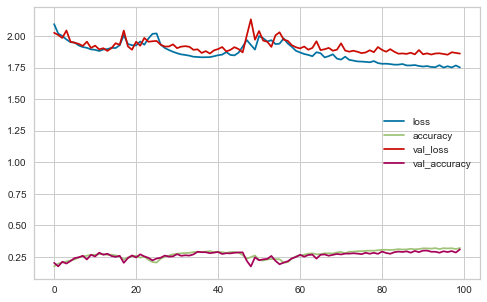

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()

plt.show()

One could observe that the differnce between the train and test performance is not significant. The model is therefore not overfitting. 

### Question 3.2 (10 points)

Try reduce the overfitting with weight regularization. You can try to add a L2-norm penalty term as the kernel_regularizer. Repeat the previous training process and explain whether regularization helps achieve a better result.

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

for layer in range(19):
    model.add(keras.layers.Dense(100, activation="relu",kernel_regularizer=keras.regularizers.l2(0.01)))

model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
import time
begin = time.perf_counter()

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

end = time.perf_counter()
timespent1 = end - begin
print(timespent1)

Epoch 1/100
1407/1407 [==============================] - 14s 8ms/step - loss: 5.6798 - accuracy: 0.1029 - val_loss: 2.3027 - val_accuracy: 0.0976
Epoch 2/100
1407/1407 [==============================] - 12s 8ms/step - loss: 2.3025 - accuracy: 0.1026 - val_loss: 2.3029 - val_accuracy: 0.0972
Epoch 3/100
1407/1407 [==============================] - 12s 8ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3028 - val_accuracy: 0.1010
Epoch 4/100
1407/1407 [==============================] - 11s 8ms/step - loss: 2.3028 - accuracy: 0.0950 - val_loss: 2.3026 - val_accuracy: 0.1038
Epoch 5/100
1407/1407 [==============================] - 11s 8ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.0972
Epoch 6/100
1407/1407 [==============================] - 11s 8ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3028 - val_accuracy: 0.0920
Epoch 7/100
1407/1407 [==============================] - 11s 8ms/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3028 -

1407/1407 [==============================] - 9s 7ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.0996
Epoch 58/100
1407/1407 [==============================] - 9s 7ms/step - loss: 2.3027 - accuracy: 0.0970 - val_loss: 2.3029 - val_accuracy: 0.0920
Epoch 59/100
1407/1407 [==============================] - 9s 7ms/step - loss: 2.3026 - accuracy: 0.1014 - val_loss: 2.3025 - val_accuracy: 0.1038
Epoch 60/100
1407/1407 [==============================] - 9s 7ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3026 - val_accuracy: 0.0996
Epoch 61/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1038
Epoch 62/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.0976
Epoch 63/100
1407/1407 [==============================] - 9s 7ms/step - loss: 2.3027 - accuracy: 0.1016 - val_loss: 2.3030 - val_accura

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1000


[2.302639961242676, 0.10000000149011612]

The accuracy score decreased after applying the regularization. This could occur due to the size of the training dataset as the dataset could be considered as small. 

Ohter reasons could be:

- Poor distribution alignment between data sets (training, testing, validation, production).
- Saturation of back propagation values in floating point.
- Outliers cause by error in example creation or labeling.
- Local optimization minima in the loss function combined with insufficient stochastic injection in SGD.
- Leaning to heavily on artificial network convergence and neglecting using other known algorithms as part of an overall system architecture.
- Using activation functions or hyper-parameters that are not well tuned to the example set or the model

### Question 3.3 (10 points)

Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

for layer in range(19):
    keras.layers.BatchNormalization(),
    model.add(keras.layers.Dense(100, activation="relu",kernel_regularizer=keras.regularizers.l2(0.01)))

model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
import time
begin = time.perf_counter()

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

end = time.perf_counter()
timespent2 = end - begin
print(timespent2)

Epoch 1/100
1407/1407 [==============================] - 14s 8ms/step - loss: 6.1813 - accuracy: 0.1008 - val_loss: 2.3029 - val_accuracy: 0.0976
Epoch 2/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3026 - accuracy: 0.1028 - val_loss: 2.3029 - val_accuracy: 0.0972
Epoch 3/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3028 - val_accuracy: 0.1010
Epoch 4/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3028 - accuracy: 0.0950 - val_loss: 2.3026 - val_accuracy: 0.1038
Epoch 5/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.0972
Epoch 6/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3028 - val_accuracy: 0.0920
Epoch 7/100
1407/1407 [==============================] - 11s 8ms/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3028 -

Epoch 57/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.0996
Epoch 58/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3027 - accuracy: 0.0970 - val_loss: 2.3029 - val_accuracy: 0.0920
Epoch 59/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3026 - accuracy: 0.1014 - val_loss: 2.3025 - val_accuracy: 0.1038
Epoch 60/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3026 - val_accuracy: 0.0996
Epoch 61/100
1407/1407 [==============================] - 11s 8ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1038
Epoch 62/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.0976
Epoch 63/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3027 - accuracy: 0.1016 - val_loss: 2

In [ ]:
print(timespent2-timespent1)

1037.795540699999


In [ ]:
model.evaluate(X_test, y_test)

The duration displayed above is not reliable as my pc was doing other ML computations on the side with question 3.2 and not with question 3.3. Nevertheless, Batch Normalization is a technique which takes care of normalizing the input of each layer to make the training process faster and more stable.

### Question 3.4 (10 points)

Try regularizing the model with dropout. Then, without retraining your model, see if you can achieve better accuracy using different rate of Dropout.

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

for layer in range(19):
    keras.layers.BatchNormalization(),    
    keras.layers.Dropout(rate=0.2),
    model.add(keras.layers.Dense(100, activation="relu",kernel_regularizer=keras.regularizers.l2(0.01)))

model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
1407/1407 [==============================] - 14s 8ms/step - loss: 6.0967 - accuracy: 0.1085 - val_loss: 2.3027 - val_accuracy: 0.0976
Epoch 2/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3026 - accuracy: 0.1044 - val_loss: 2.3030 - val_accuracy: 0.0972
Epoch 3/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3028 - val_accuracy: 0.1010
Epoch 4/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3028 - accuracy: 0.0948 - val_loss: 2.3026 - val_accuracy: 0.1038
Epoch 5/100
1407/1407 [==============================] - 9s 7ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.0972
Epoch 6/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3028 - val_accuracy: 0.0920
Epoch 7/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3028 - 

Epoch 57/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.0996
Epoch 58/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3027 - accuracy: 0.0970 - val_loss: 2.3029 - val_accuracy: 0.0920
Epoch 59/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3026 - accuracy: 0.1014 - val_loss: 2.3025 - val_accuracy: 0.1038
Epoch 60/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3026 - val_accuracy: 0.0996
Epoch 61/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1038
Epoch 62/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.0976
Epoch 63/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3027 - accuracy: 0.1016 - val_loss: 2

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1000


[2.302639961242676, 0.10000000149011612]

Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel. During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.

Dropout is a regularization technique. You should use it only to reduce variance (validation performance vs training performance)

### Question 3.5 (10 points) 

Add Earlystopping to the model and save the model at the early stopping epoch using the callbacks. 

Last, load the model and evaluate on the test set.

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

for layer in range(19):
    keras.layers.BatchNormalization(),    
    keras.layers.Dropout(rate=0.2),
    model.add(keras.layers.Dense(100, activation="relu",kernel_regularizer=keras.regularizers.l2(0.01)))

model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/100
1407/1407 [==============================] - 12s 8ms/step - loss: 5.8424 - accuracy: 0.1015 - val_loss: 2.3027 - val_accuracy: 0.0976
Epoch 2/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3025 - accuracy: 0.1014 - val_loss: 2.3029 - val_accuracy: 0.0972
Epoch 3/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.1010
Epoch 4/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3028 - accuracy: 0.0950 - val_loss: 2.3026 - val_accuracy: 0.1038
Epoch 5/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.0972
Epoch 6/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3028 - val_accuracy: 0.0920
Epoch 7/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3028 -

In [ ]:
model.save("model_cifar10.h5")

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1000


[2.302604913711548, 0.10000000149011612]